## Scatter plot, AQI vs Cancer Incidence Count(2011-2015)

In [3]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from config import state_abbrev, reverse_state_abbrev, state_codes

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

## AQI Data by county 
Years: 2011 to 2015

In [4]:
def read_data(filepath):
    return pd.read_csv(filepath)

aqi_2011_df = read_data("raw_data/annual_aqi_by_county_2011.csv")
aqi_2012_df = read_data("raw_data/annual_aqi_by_county_2012.csv")
aqi_2013_df = read_data("raw_data/annual_aqi_by_county_2013.csv")
aqi_2014_df = read_data("raw_data/annual_aqi_by_county_2014.csv")
aqi_2015_df = read_data("raw_data/annual_aqi_by_county_2015.csv")

# Concatenating the Air Quality data
aqi_2011_to_2015_data = pd.concat([aqi_2011_df, aqi_2012_df, aqi_2013_df, aqi_2014_df,
                                   aqi_2015_df])

for y in ['State', 'County']:
    aqi_2011_to_2015_data[y] = aqi_2011_to_2015_data[y].apply(lambda x: x.lower())

# Retrieving specific columns related to the AQI data
columns = ['State', 'County', 'Year', 'Days with AQI', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10']
aqi_2011_to_2015_data =  aqi_2011_to_2015_data[columns]
aqi_2011_to_2015_data.head(10)

,State,County,Year,Days with AQI,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,alabama,baldwin,2011,282,126,74,42,0,0,209,0,73,0
1,alabama,clay,2011,118,86,63,39,0,0,0,0,118,0
2,alabama,colbert,2011,279,101,61,42,0,0,197,0,82,0
3,alabama,dekalb,2011,336,101,63,40,0,0,271,0,65,0
4,alabama,elmore,2011,242,105,64,44,0,0,242,0,0,0
5,alabama,etowah,2011,275,99,62,41,0,0,188,0,87,0
6,alabama,houston,2011,283,100,67,44,0,0,207,0,76,0
7,alabama,jefferson,2011,365,182,105,58,2,0,120,3,224,16
8,alabama,lawrence,2011,95,82,59,34,0,0,0,0,95,0
9,alabama,madison,2011,331,126,77,44,0,0,202,0,76,53


Calculating the average of "Max AQI" and average of "Median AQI" for (2011-2015)

In [5]:
grouped = aqi_2011_to_2015_data.groupby(["State", "County"])["Max AQI", "Median AQI"].mean()
county_avg_aqi_df = pd.DataFrame(grouped)
county_avg_aqi_df.head()

Max AQI  Median AQI
State   County                      
alabama baldwin    113.2        38.4
        clay        76.8        34.8
        colbert     95.4        38.6
        dekalb     100.0        38.6
        elmore      98.2        38.2

### US Cancer Data - by County

In [6]:
# Read in county data for cancer incidences
csv = "Choropleth Testing/Resources/county_cancer_data.csv"
county_cancer_data = pd.read_csv(csv, encoding='latin-1')
county_cancer_data = county_cancer_data.rename(columns = {"County": "Geography"})

# Parse geographic info into county and state
county_cancer_data['County'] = county_cancer_data['Geography'].apply(lambda x: x.split(', ')[0].lower())
county_cancer_data['County'] = county_cancer_data['County'].apply(lambda x: x.replace(' county', '').replace(' parish', '').replace(' borough', ''))
county_cancer_data['State'] = county_cancer_data['Geography'].apply(lambda x: x.split(', ')[-1].split('(')[0])
county_cancer_data['FIPS'] = county_cancer_data[' FIPS']

# Remove values that don't contain state data
county_cancer_data = county_cancer_data.loc[county_cancer_data['State'] != 'US ']
county_cancer_data = county_cancer_data.loc[county_cancer_data['State'] != 'Puerto Rico']

# Remove null datapoints
county_cancer_data = county_cancer_data.loc[county_cancer_data['Average Annual Count'] != '¶ ']
county_cancer_data = county_cancer_data.loc[county_cancer_data['Average Annual Count'] != '¶¶']
county_cancer_data = county_cancer_data.loc[county_cancer_data['Average Annual Count'] != '¶']
county_cancer_data = county_cancer_data.loc[county_cancer_data['Met Healthy People Objective of ***?'] != '<font color=grey>*</font>']

# Change numeric dtypes
county_cancer_data[['Average Annual Count', 'FIPS']\
                   ] = county_cancer_data[['Average Annual Count', 'FIPS']].astype(int)

# Add column for state abbreviation
county_cancer_data['State Abbreviation'] = county_cancer_data['State'].apply(lambda x: reverse_state_abbrev[x])

# Make state name lowercase
county_cancer_data['State'] = county_cancer_data['State'].apply(lambda x: x.lower())

county_cancer_data.head()

,Geography,FIPS,Met Healthy People Objective of ***?,"Age-Adjusted Incidence Rate() - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend () in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,County,State,FIPS,State Abbreviation
1,"Union County, Florida(6,10)",12125,***,215.1,183.2,251.1,38,stable,-2.5,-24,25,union,florida,12125,FL
2,"Owsley County, Kentucky(7,8)",21189,***,179.7,134.8,236.3,11,rising,4.3,0.9,7.7,owsley,kentucky,21189,KY
3,"McCreary County, Kentucky(7,8)",21147,***,154.1,130.5,180.9,32,stable,-0.7,-3,1.7,mccreary,kentucky,21147,KY
4,"North Slope Borough, Alaska(6,10)",2185,***,150.8,97,220.1,7,stable,-0.2,-36.8,57.8,north slope,alaska,2185,AK
5,"Powell County, Kentucky(7,8)",21197,***,140.9,115.2,171,22,stable,0.4,-3.3,4.3,powell,kentucky,21197,KY


In [7]:
columns = ['Geography', 'FIPS', 'County', 'State', 'State Abbreviation', 'Average Annual Count', 'Age-Adjusted Incidence Rate() - cases per 100,000']
county_cancer_data = county_cancer_data[columns]
county_cancer_data.head()

,Geography,FIPS,County,State,State Abbreviation,Average Annual Count,"Age-Adjusted Incidence Rate() - cases per 100,000"
1,"Union County, Florida(6,10)",12125,union,florida,FL,38,215.1
2,"Owsley County, Kentucky(7,8)",21189,owsley,kentucky,KY,11,179.7
3,"McCreary County, Kentucky(7,8)",21147,mccreary,kentucky,KY,32,154.1
4,"North Slope Borough, Alaska(6,10)",2185,north slope,alaska,AK,7,150.8
5,"Powell County, Kentucky(7,8)",21197,powell,kentucky,KY,22,140.9


In [8]:
# Combine fips df with county AQI df
county_avg_aqi_df.reset_index(inplace=True)
merge_aqi_cancer_df = county_avg_aqi_df.merge(county_cancer_data, how='inner', on=['State','County'])

merge_aqi_cancer_df.head()

,State,County,Max AQI,Median AQI,Geography,FIPS,State Abbreviation,Average Annual Count,"Age-Adjusted Incidence Rate() - cases per 100,000"
0,alabama,baldwin,113.2,38.4,"Baldwin County, Alabama(6,10)",1003,AL,184,67.4
1,alabama,clay,76.8,34.8,"Clay County, Alabama(6,10)",1027,AL,17,87.1
2,alabama,colbert,95.4,38.6,"Colbert County, Alabama(6,10)",1033,AL,54,69.7
3,alabama,dekalb,100.0,38.6,"DeKalb County, Alabama(6,10)",1049,AL,53,61.6
4,alabama,elmore,98.2,38.2,"Elmore County, Alabama(6,10)",1051,AL,64,72.2


### Scatter Plot

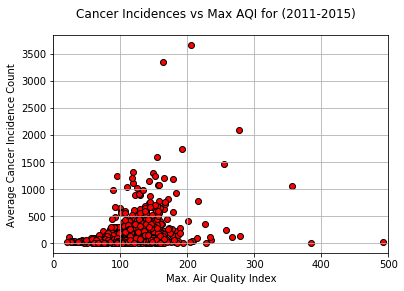

In [33]:
# Tell matplotlib to create a scatter plot based upon the above data
x_axis = merge_aqi_cancer_df["Max AQI"]
y_axis = merge_aqi_cancer_df["Average Annual Count"]

# scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")

# Set the upper and lower limits of our y axis
# plt.ylim(-20, 2000)

# Set the upper and lower limits of our x axis
plt.xlim(0,500)

# Create a title, x label, and y label for our chart
plt.suptitle("Cancer Incidences vs Max AQI for (2011-2015)")
plt.xlabel("Max. Air Quality Index")
plt.ylabel("Average Cancer Incidence Count")
plt.grid()
plt.show()

0.32439612093109677


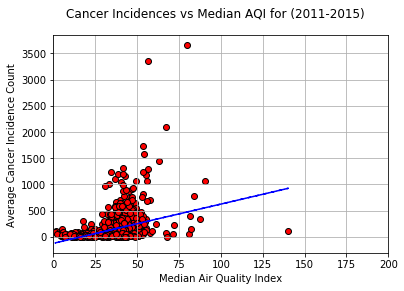

In [32]:
# Tell matplotlib to create a scatter plot based upon the above data
x_axis = merge_aqi_cancer_df["Median AQI"]
y_axis = merge_aqi_cancer_df["Average Annual Count"]

# scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")

# Set the upper and lower limits of our y axis
# plt.ylim(-20, 2000)

# Set the upper and lower limits of our x axis
plt.xlim(0,200)

# Fitting a regression line
z = np.polyfit(x_axis, y_axis, 1) 
p = np.poly1d(z)
plt.plot(x_axis, p(x_axis), color = "blue", linestyle = "--") 
slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis, y_axis)
print(r_value)

# Create a title, x label, and y label for our chart
plt.suptitle("Cancer Incidences vs Median AQI for (2011-2015)")
plt.xlabel("Median Air Quality Index")
plt.ylabel("Average Cancer Incidence Count")
plt.grid()
plt.show()